C:\Users\Administrator\AppData\Local\Temp\ipykernel_6992\2166589518.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(netflix_dizileri.keys()), y=[v["izlenme"] for v in netflix_dizileri.values()], palette="coolwarm")


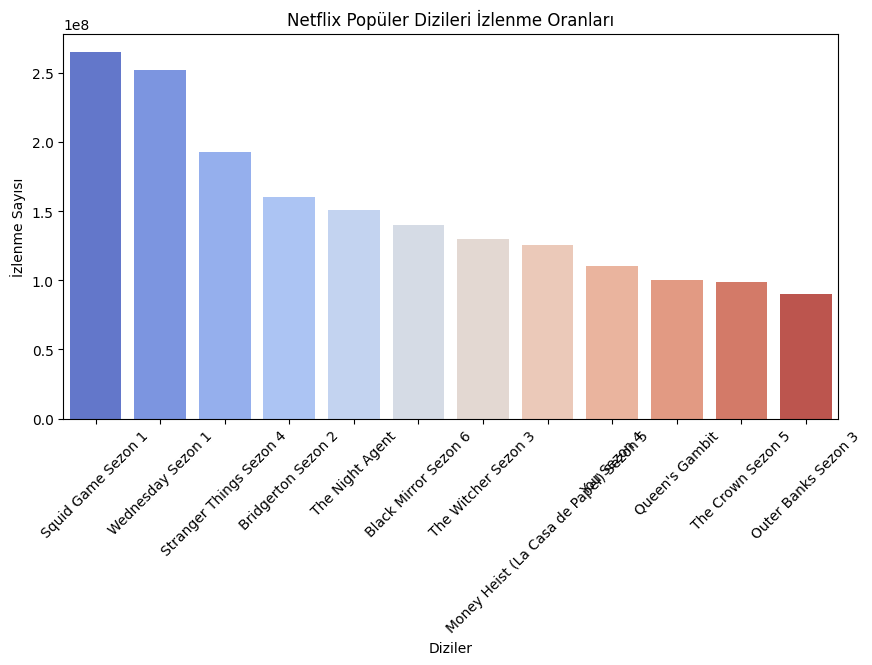

In [4]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import messagebox

# Güncellenmiş Netflix dizileri ve IMDb puanları
netflix_dizileri = {
    "Squid Game Sezon 1": {"izlenme": 265_200_000, "imdb": 8.2, "tür": "Gerilim"},
    "Wednesday Sezon 1": {"izlenme": 252_100_000, "imdb": 7.9, "tür": "Fantastik"},
    "Stranger Things Sezon 4": {"izlenme": 192_600_000, "imdb": 8.7, "tür": "Bilim Kurgu"},
    "Bridgerton Sezon 2": {"izlenme": 160_300_000, "imdb": 7.3, "tür": "Romantik"},
    "The Night Agent": {"izlenme": 150_500_000, "imdb": 7.5, "tür": "Aksiyon"},
    "Black Mirror Sezon 6": {"izlenme": 140_200_000, "imdb": 8.6, "tür": "Bilim Kurgu"},
    "The Witcher Sezon 3": {"izlenme": 130_000_000, "imdb": 7.8, "tür": "Fantastik"},
    "Money Heist (La Casa de Papel) Sezon 5": {"izlenme": 125_300_000, "imdb": 8.3, "tür": "Suç"},
    "You Sezon 4": {"izlenme": 110_400_000, "imdb": 7.7, "tür": "Gerilim"},
    "Queen's Gambit": {"izlenme": 100_500_000, "imdb": 8.6, "tür": "Drama"},
    "The Crown Sezon 5": {"izlenme": 98_700_000, "imdb": 8.5, "tür": "Tarih"},
    "Outer Banks Sezon 3": {"izlenme": 90_200_000, "imdb": 7.5, "tür": "Macera"},
}

# IMDb Tahminleme Algoritması
def imdb_tahminle(izlenme):
    return round(7 + (izlenme / 50_000_000), 1)

# Uygulama penceresi
root = tk.Tk()
root.title("Netflix İzlenme Oranları ve IMDb Puanı Tahmini")
root.geometry("600x400")

# Başlık
title_label = tk.Label(root, text="Netflix IMDb Tahmin ve Öneri Uygulaması", font=("Arial", 14, "bold"))
title_label.pack(pady=10)

# Açıklama
desc_label = tk.Label(root, text="Bir Netflix dizisi seç veya ara, IMDb puanını ve önerileri gör!", font=("Arial", 10))
desc_label.pack()

# Dizi seçme alanı
selected_dizi = tk.StringVar()
dizi_combobox = ttk.Combobox(root, textvariable=selected_dizi, values=list(netflix_dizileri.keys()))
dizi_combobox.pack(pady=5)

# Arama Kutusu
search_entry = tk.Entry(root, width=30)
search_entry.pack(pady=5)

# Sonuç etiketi
result_label = tk.Label(root, text="", font=("Arial", 12), fg="blue")
result_label.pack(pady=10)

# IMDb ve önerileri gösteren fonksiyon
def show_details():
    dizi = selected_dizi.get()
    if dizi in netflix_dizileri:
        izlenme = netflix_dizileri[dizi]["izlenme"]
        imdb_puan = netflix_dizileri[dizi]["imdb"]
        tür = netflix_dizileri[dizi]["tür"]
        öneriler = [k for k, v in netflix_dizileri.items() if v["tür"] == tür and k != dizi]

        result_text = f"{dizi}\nİzlenme: {izlenme:,}\nIMDb Puanı: {imdb_puan}\nTür: {tür}\nÖnerilen Diziler:\n" + "\n".join(öneriler)
        result_label.config(text=result_text)
    else:
        result_label.config(text="Dizi bulunamadı!")

# Arama fonksiyonu
def search_dizi():
    search_term = search_entry.get().strip().lower()
    matching_dizi = [dizi for dizi in netflix_dizileri if search_term in dizi.lower()]
    
    if matching_dizi:
        selected_dizi.set(matching_dizi[0])
        show_details()
    else:
        messagebox.showerror("Hata", "Dizi bulunamadı!")

# Grafik Gösterme Fonksiyonu
def show_graph():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(netflix_dizileri.keys()), y=[v["izlenme"] for v in netflix_dizileri.values()], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel("Diziler")
    plt.ylabel("İzlenme Sayısı")
    plt.title("Netflix Popüler Dizileri İzlenme Oranları")
    plt.show()

# Butonlar
show_button = tk.Button(root, text="IMDb Puanını ve Önerileri Göster", command=show_details)
show_button.pack(pady=10)

search_button = tk.Button(root, text="Dizi Ara", command=search_dizi)
search_button.pack(pady=5)

graph_button = tk.Button(root, text="Grafik Göster", command=show_graph)
graph_button.pack(pady=10)

# Ana döngüyü çalıştırma
root.mainloop()
